## Objetivo da semana: realizar a feature extraction dos dados.

Problema: base de dados MFPT (dados de vibração em rolamentos).

Geração de features: dados estatísticos da base de dados (média, desvio padrão, amplitude...).

Próximos passos: testar modelos de classificação e verificar qual se comporta melhor, caso não se consiga um resultado favorável, retornar para a feature extraction.

In [4]:
import os
import scipy
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("tab10")


In [5]:
print(f"scipy: {scipy.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")

scipy: 1.7.1
numpy: 1.21.2
pandas: 1.3.4
seaborn: 0.11.2


## MFPT Data Generator

Preprocessamento dos dados de MFPT com nas features temporais.


### Carregar os dados de sinais brutos


In [6]:
# Parâmetros
data_directory = 'MFPT Fault Data Sets'
verbose = True 

# Nome dos arquivos da base de dados:
data_folders = {'1 - Three Baseline Conditions': 'B',
                '2 - Three Outer Race Fault Conditions': 'ORF',
                '3 - Seven More Outer Race Fault Conditions': 'VORF',
                '4 - Seven Inner Race Fault Conditions': 'VIRF'}

# Dicicionário auxiliar:
data_dict = {}

# Carregando os dados, iterando com o processo:
for data_folder in data_folders.keys():
    for f in os.listdir(os.path.join(data_directory, data_folder)):
        if ".mat" in f:
            # Path
            file_path = os.path.join(data_directory, data_folder, f)
            # Carregando os dados .mat
            mat = sio.loadmat(file_path)
            # Remove a extensão .mat do nome
            name = f.strip('.mat')
            # Consegue os sinais de dados
            raw_signal = mat['bearing']['gs'][0][0].flatten()
            # Consegue a velocidade rotacional do rolamento:
            shaft_rate = float(mat['bearing']['rate'][0][0][0])
            # Consegue a carga utilizada:
            load = float(mat['bearing']['load'][0][0][0])
            # Consegue a frequência de amostragem:
            sampling_rate = float(mat['bearing']['sr'][0][0][0])
            # Constrói os dicionários:
            data_dict[name] = {'raw_signal': raw_signal, 'shaft_rate': shaft_rate,'load': load,'sampling_rate': sampling_rate}
            if verbose:
                print('\n----------------------------------')
                print(name.upper(), '\n----------------------------------')
                print('-> shape: {}'.format(raw_signal.shape))
                print('-> shaft_rate: {}'.format(shaft_rate))
                print('-> load: {}'.format(load))
                print('-> sampling_rate: {}'.format(sampling_rate))
                print('-> full path: {}'.format(file_path))


----------------------------------
BASELINE_1 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: MFPT Fault Data Sets\1 - Three Baseline Conditions\baseline_1.mat

----------------------------------
BASELINE_2 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: MFPT Fault Data Sets\1 - Three Baseline Conditions\baseline_2.mat

----------------------------------
BASELINE_3 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: MFPT Fault Data Sets\1 - Three Baseline Conditions\baseline_3.mat

----------------------------------
OUTERRACEFAULT_1 
----------------------------------
-> shape: (585936,)
-> shaft_rate: 25.0
-> load: 270.0
-> sampling_rate: 97656.0
-> full path: MFPT Fault Data Sets\2 - Three Outer Race Fault Conditions\OuterRaceFault_1.mat

---

In [7]:
data_df = pd.DataFrame(data=data_dict).transpose()
data_df

,raw_signal,shaft_rate,load,sampling_rate
baseline_1,"[0.8315881, 0.0387017, 0.4676445, 0.6616452, 1...",25.0,270.0,97656.0
baseline_2,"[0.3685337, -0.3983136, -1.303466, -0.04901395...",25.0,270.0,97656.0
baseline_3,"[0.8407559, 0.5152432, -0.03834483, 1.184862, ...",25.0,270.0,97656.0
OuterRaceFault_1,"[1.301891, -0.6672074, -0.4034944, 0.8490131, ...",25.0,270.0,97656.0
OuterRaceFault_2,"[0.3083091, -0.1723548, 0.8998852, 0.6174551, ...",25.0,270.0,97656.0
OuterRaceFault_3,"[0.718744, 0.4493211, -0.975775, -0.6292318, -...",25.0,270.0,97656.0
OuterRaceFault_vload_1,"[-0.06989686, 1.184481, 1.568139, 0.1725271, 1...",25.0,25.0,48828.0
OuterRaceFault_vload_2,"[-0.1909366, 0.3785875, -0.4904225, -1.442238,...",25.0,50.0,48828.0
OuterRaceFault_vload_3,"[-1.151945, 0.5270445, 0.169586, -1.615467, -0...",25.0,100.0,48828.0
OuterRaceFault_vload_4,"[-0.6417344, -1.733873, -0.896255, 0.5547817, ...",25.0,150.0,48828.0


### Funções auxiliares 

Determinam as funções para o feature extraction e a função de split dos dados

In [8]:
def average(L):
    return [np.mean(aux) for aux in L]
def variance(L):
    return [np.var(aux) for aux in L]
def max_amplitude(L):
    return [np.amax(aux) for aux in L]
def rms(L):
    # root mean square
    return [np.sqrt(np.mean(aux**2)) for aux in L]
def peak_to_peak(L):
    #diferença do mínimo pro máximo:
    return [np.amax(aux) - np.amin(aux) for aux in L]
def split_signal(x, L, overlap):
    splitted = [x[i: i + L] for i in range(0, len(x), L - overlap)
                if i + L <= len(x)]
    return splitted

### Processo de geração de features:



In [9]:
# Parâmetros
L = 4000
overlap = 200 
features_funcs = {'average': average,
                  'variance': variance,
                  'max_amplitude': max_amplitude,
                  'rms': rms,
                  'peak_to_peak': peak_to_peak}

df_list = []
for cat, att in data_dict.items():
    #extrai os sinais:
    raw_signal = att['raw_signal']
    # Realiza o split dos dados:
    splitted_raw_signal = split_signal(raw_signal, L, overlap)
    # Geração de features para cada categoria:
    features_dict = {}
    for name, fn in features_funcs.items():
        features_dict[name] = fn(splitted_raw_signal)
    # Transforma para dataset
    df = pd.DataFrame(data=features_dict)
    # Adiciona a coluna com as categorias:
    df['category'] = cat
    df_list.append(df)

mfpt_features = pd.concat(df_list).reset_index(drop=True)
mfpt_features

,average,variance,max_amplitude,rms,peak_to_peak,category
0,-0.121125,0.751596,3.423703,0.875367,6.345060,baseline_1
1,-0.121984,0.787023,3.708878,0.895491,6.898513,baseline_1
2,-0.137908,0.777239,2.619311,0.892332,6.729591,baseline_1
3,-0.127679,0.765857,3.176111,0.884397,6.903780,baseline_1
4,-0.125593,0.799128,3.589979,0.902719,6.932772,baseline_1
...,...,...,...,...,...,...
1451,-0.196284,4.446714,22.618700,2.117839,44.124120,InnerRaceFault_vload_7
1452,-0.201124,2.966581,18.566240,1.734079,34.820900,InnerRaceFault_vload_7
1453,-0.191954,4.178469,22.353690,2.053123,45.545410,InnerRaceFault_vload_7
1454,-0.185064,3.389286,20.566810,1.850280,41.197760,InnerRaceFault_vload_7


### Numerando as classes:

In [10]:
#Mudando os nomes das cartegorias:
mfpt_features['category'] = mfpt_features['category'].replace({'baseline_1': 0,
                                                                'baseline_2': 0,
                                                                'baseline_3': 0,
                                                                'OuterRaceFault_1': 1,
                                                                'OuterRaceFault_2': 1,
                                                                'OuterRaceFault_3': 1,
                                                                'OuterRaceFault_vload_1': 1,
                                                                'OuterRaceFault_vload_2': 1,
                                                                'OuterRaceFault_vload_3': 1,
                                                                'OuterRaceFault_vload_4': 1,
                                                                'OuterRaceFault_vload_5': 1,
                                                                'OuterRaceFault_vload_6': 1,
                                                                'OuterRaceFault_vload_7': 1,
                                                                'InnerRaceFault_vload_1': 2,
                                                                'InnerRaceFault_vload_2': 2,
                                                                'InnerRaceFault_vload_3': 2,
                                                                'InnerRaceFault_vload_4': 2,
                                                                'InnerRaceFault_vload_5': 2,
                                                                'InnerRaceFault_vload_6': 2,
                                                                'InnerRaceFault_vload_7': 2})

# Pegando os x's e os y's:
y = mfpt_features['category'].values
x = mfpt_features.drop(columns=['category']).values

# Printando o formato das imagens:
print(f"Shape of features: {x.shape}")
print(f"Shape of labels: {y.shape}")

print(y)

Shape of features: (1456, 5)
Shape of labels: (1456,)
[0 0 0 ... 2 2 2]


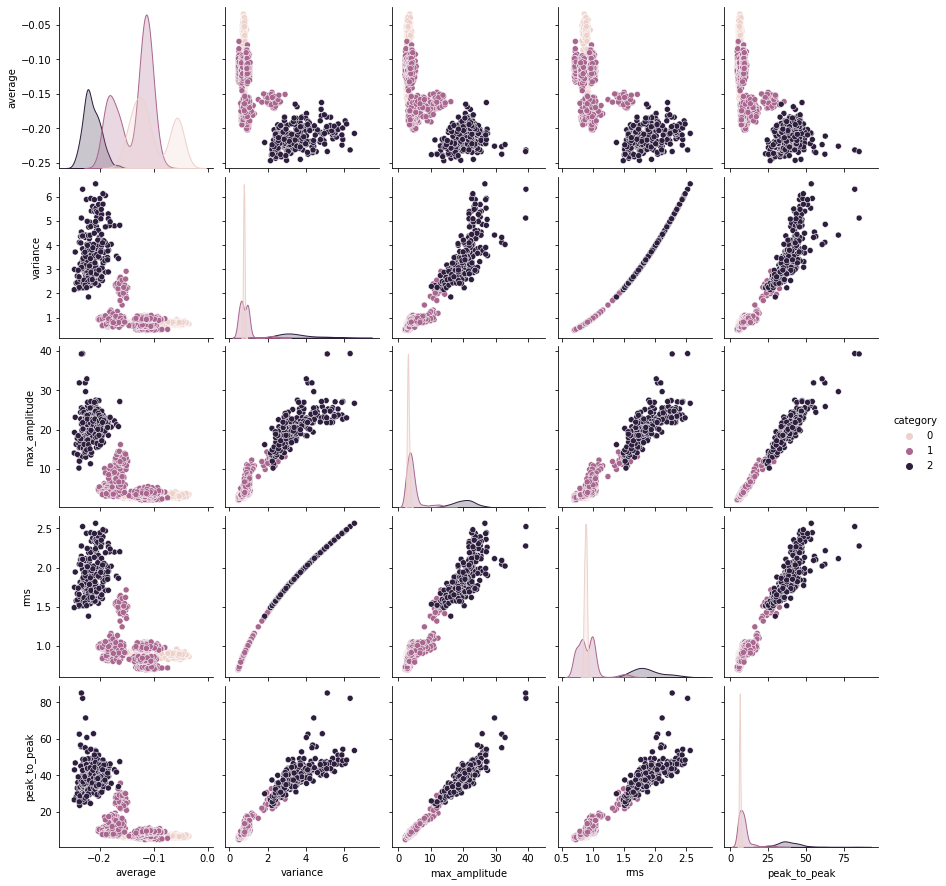

In [16]:
sns.pairplot(mfpt_features, hue="category")

In [12]:
# np.savez("MFPT_Features_3labels.npz", x_features=x, y_labels=y)

